In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2 # openCV
import numpy as np
from google.colab.patches import cv2_imshow

In [11]:
original_img = cv2.imread('/content/drive/My Drive/AISummerSchool2025/pitt.png')

In [ ]:
original_img.shape
cv2_imshow(original_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resize Scaledown Image Width:  211
Resize Scaledown Image Height:  207


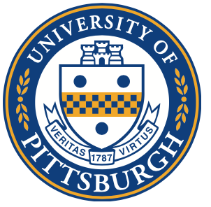

In [12]:
# Scaling down the original image
scale_percent = 70

#calculate the 70 percent of original image dimensions
resize_scaledown_width = int(original_img.shape[1] * scale_percent / 100)
resize_scaledown_height = int(original_img.shape[0] * scale_percent / 100)

resize_scaledown_img = cv2.resize(original_img,(resize_scaledown_width, resize_scaledown_height))

print('Resize Scaledown Image Width: ', resize_scaledown_width)
print ('Resize Scaledown Image Height: ', resize_scaledown_height)
cv2.imwrite('/content/drive/My Drive/HI2454/pitt_V2.png', resize_scaledown_img)
cv2_imshow(resize_scaledown_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

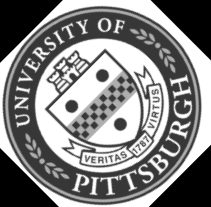

In [13]:
grayscale_img = cv2.cvtColor(resize_scaledown_img, cv2.COLOR_BGR2GRAY)
#rotating image -> +45 degree
M = cv2.getRotationMatrix2D(((grayscale_img.shape[1])/2.0,(grayscale_img.shape[0])/2.0),45,1)
rotated_img = cv2.warpAffine(grayscale_img,M,(grayscale_img.shape[1],grayscale_img.shape[0]))
cv2_imshow(rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

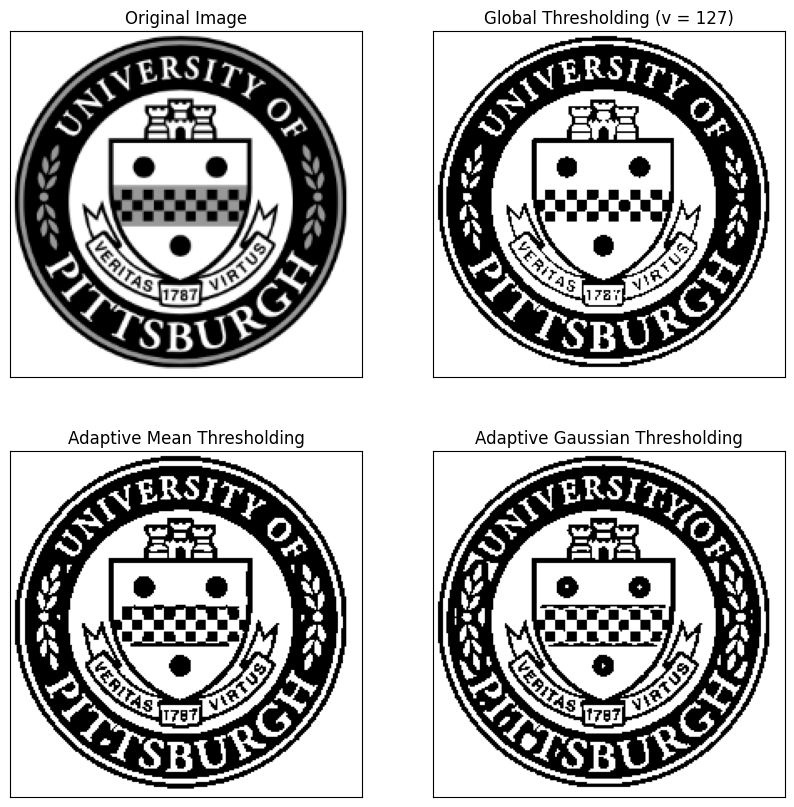

In [14]:
grayscale_img = cv2.cvtColor(resize_scaledown_img, cv2.COLOR_BGR2GRAY)

from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))

#binary thresholding (global thresholding)
ret,th1 = cv2.threshold(grayscale_img,127,255,cv2.THRESH_BINARY)

#adaptive thresholding (mean or gussian)
th2 = cv2.adaptiveThreshold(grayscale_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(grayscale_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [grayscale_img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

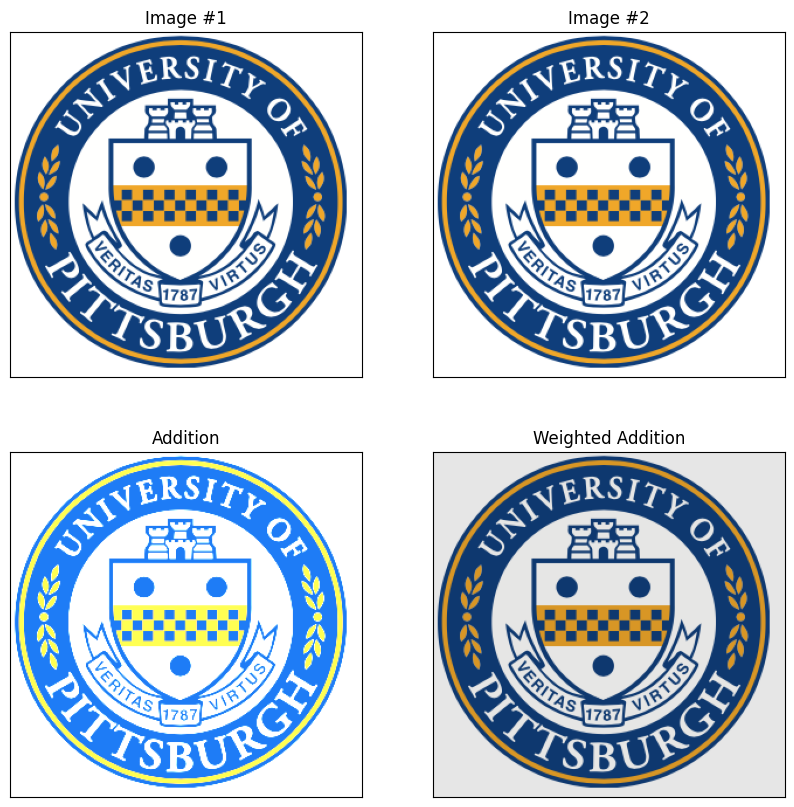

In [15]:
image1 = cv2.imread('/content/drive/My Drive/AISummerSchool2025/pitt.png')
image2 = cv2.imread('/content/drive/My Drive/AISummerSchool2025/pitt.png')
plt.figure(figsize = (10,10))

sum_Img = cv2.add(image1,image2)
weightedSum_Img = cv2.addWeighted(image1, 0.5, image2, 0.4, 0)

titles = ['Image #1', 'Image #2',
            'Addition', 'Weighted Addition']
images = [image1, image2, sum_Img, weightedSum_Img]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()